# Dsitribución Normal e Histogramas.

Imaginemos por un momento el siguiente experimento: 
    
Queremos estudiar la probabilidad de que al lanzar una moneda obtengamos cara o sello, de antamento sabemos que esta es del 50%.
Pero analizemos un poco mas a fondo, ¿Cual será la probabilidad de sacar 10 caras consecutivas?

Para responder proponemos el siguiente método:

1. Lanzamos una moneda 10 veces y miramos si sale cara o sello y guardamos estos datos. 
2. Repetimos este procedimiento y 1000 veces.

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Funcion que lanza la moneda N veces.

In [7]:
def coinflip(N):
    cara = 0
    sello = 0
    i=0
    while i < N:
        x = np.random.randint(0, 10)/5.0
        if x >= 1.0:
            cara+=1
        elif x<1.0:
            sello+=1
        i+=1
    return cara/N, sello/N

## Función que hace M veces N lanzamientos.

In [8]:
def realizaciones(M, N):
    caras=[]
    for i in range(M):
        x, y = coinflip(N)
        caras.append(x)
    return caras

In [22]:
caras = realizaciones(200, 30.)

La mejor de visuzalizar estos resultados es por medio de histogramas. En Python hay dos funciones para hacer esto: 
    
1. hist
2. histogram (Numpy)

## 1.  Numpy-histogram

In [53]:
N, bins =  histogram(caras, bins=15)

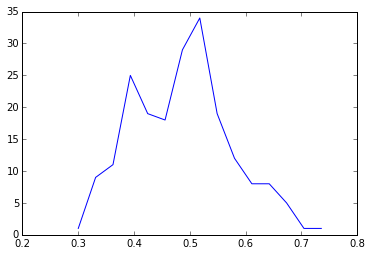

In [54]:
plot(bins[0:-1], N)

Cual es la probabilidad de sacar 9 veces cara en 10 lanzamientos?

## 2. hist

(array([ 0.17647059,  0.26470588,  1.23529412,  0.79411765,  4.32352941,
         5.73529412,  1.76470588,  1.94117647,  1.05882353,  0.35294118]),
 array([ 0.2       ,  0.25666667,  0.31333333,  0.37      ,  0.42666667,
         0.48333333,  0.54      ,  0.59666667,  0.65333333,  0.71      ,
         0.76666667]),
 <a list of 10 Patch objects>)

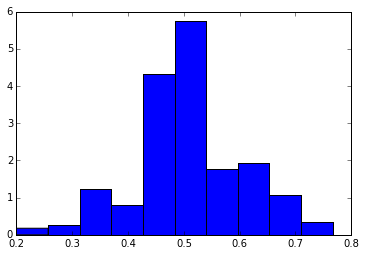

In [25]:
hist(caras, normed=True)

In [141]:
caras = realizaciones(100000, 30.)

(array([  4.90909091e-03,   1.47272727e-02,   5.37272727e-02,
         1.42909091e-01,   3.81272727e-01,   7.73727273e-01,
         1.37209091e+00,   2.16681818e+00,   3.03818182e+00,
         3.70909091e+00,   7.61236364e+00,   3.03218182e+00,
         2.21236364e+00,   1.39663636e+00,   7.68545455e-01,
         3.67090909e-01,   1.52454545e-01,   5.50909091e-02,
         1.44545455e-02,   4.09090909e-03]),
 array([ 0.13333333,  0.17      ,  0.20666667,  0.24333333,  0.28      ,
        0.31666667,  0.35333333,  0.39      ,  0.42666667,  0.46333333,
        0.5       ,  0.53666667,  0.57333333,  0.61      ,  0.64666667,
        0.68333333,  0.72      ,  0.75666667,  0.79333333,  0.83      ,
        0.86666667]),
 <a list of 20 Patch objects>)

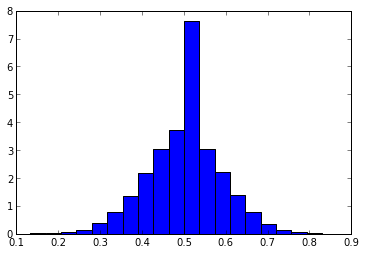

In [142]:
hist(caras, normed=True, bins=20)

# Distribución de Probabilidad:

En general estas figuras se denominan distribuciones de probabilidad y dan información de cual es la probabilidad de que una variable aleatoria aprezca en un intervalo dado. En partícular la función que acabamos de graficar se denomina distribucion normal o gaussiana.

#Normal Distribution, descripcion matematica.

$f(x, \mu, \sigma) = \dfrac{1}{\sigma \sqrt(2\pi)} e^{-\dfrac{(x-\mu)^2}{2\sigma^2}} $

donde $\sigma$ es la desviacion estandar y $\mu$ la media de los datos $x$

Es una función de distribucion de probabilidad que esta totalmente determinada por los parametros $\mu$ y $\sigma$. 

La funcion es simetrica alrededor de $\mu$.

En python podemos usar scipy para hacer uso de la función normal.

In [89]:
import scipy.stats

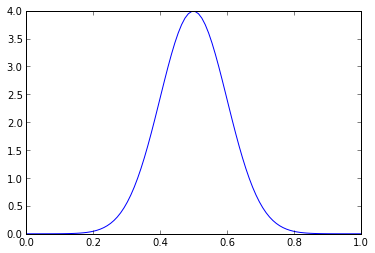

In [120]:
#def normal(m,s):
x = np.linspace(0, 1, 100)
n = scipy.stats.norm(0.5, 0.1) # El valor medio es 0.5 y la desviacion estandar = 0.1
plot(x, n.pdf(x))
 
#normal(m=(0.25,0.75), s=(0.1, 1.0))


# Histograma 2D

## genero numeros aleatorios con una distribucion normal:

In [39]:
x = np.random.normal(0.0, 1.0, 1000)
y = np.random.normal(0.0, 2.0, 1000)
w = np.random.normal(0.0, 3.0, 1000)
z = np.random.normal(0.0, 4.0, 1000)

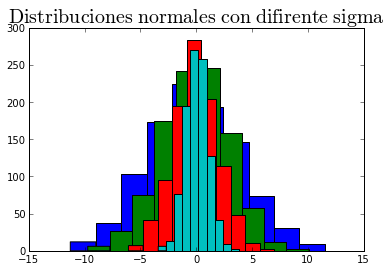

In [128]:
histo = hist(z)
histo = hist(w)
histo = hist(y)
histo = hist(x)

title(r"$\rm{Distribuciones\ normales\ con\ difirente\ sigma}$", fontsize=20)

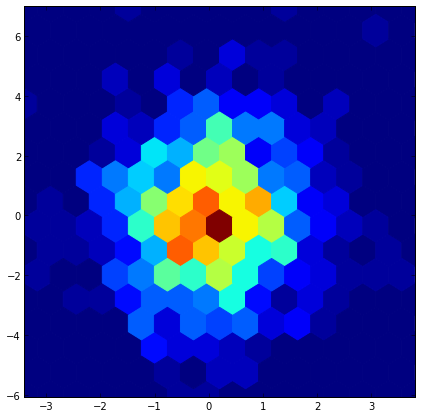

In [131]:
figure(figsize=(7, 7))
hexbin(x, y, gridsize=15)

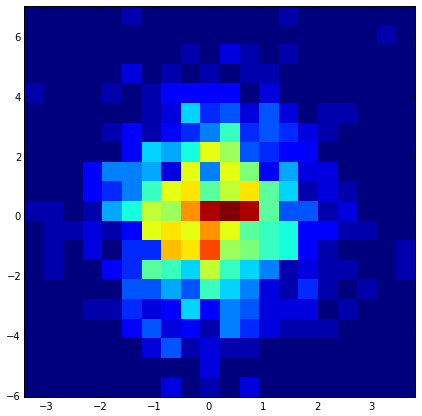

In [144]:
figure(figsize=(7, 7))
data = hist2d(x, y, bins=20)

#Intervalo de confianza

$\sigma_1$ = 68% de los datos van a estar dentro de 1$\sigma$

$\sigma_2$ = 95% de los datos van a estar dentro de 2$\sigma$

$\sigma_3$ = 99.7% de los datos van a estar dentro de 3$\sigma$





# PDF 

In [35]:
caras = realizaciones(200, 30.)

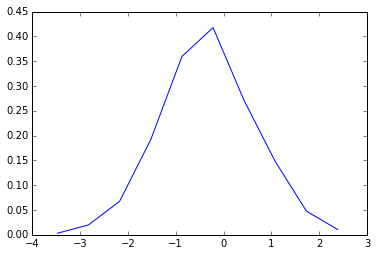

In [40]:
N, bins =  histogram(x, density=True)
plot(bins[0:-1], N)

#CDF

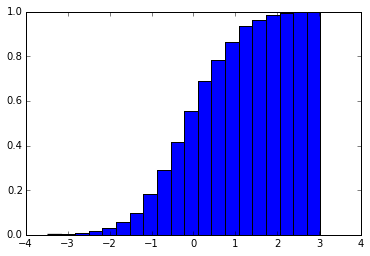

In [59]:
h = hist(x, cumulative=True, bins=20, normed=True)

# References: 
- Ejemplo de la Moneda: Introduction to computation and programming using Python. , John Guttag. Pagina 179.
- Ejemplos de estadistica en python: http://nbviewer.ipython.org/github/dhuppenkothen/ClassicalStatsPython/blob/master/classicalstatsexamples.ipynb
- Para ver una derivación matematica: A Modern course in Statistical Physics, Reichl, Pagina 191.